In [1]:
import tensorflow as tf

In [2]:
#Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-04-23 05:37:17--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-04-23 05:37:17 (13.3 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [8]:
#Load in data
data= pd.read_csv('moore.csv' , header=None).to_numpy()

In [13]:
 X = data[:,0].reshape(-1,1) #making an N x D
 Y = data[:,1]

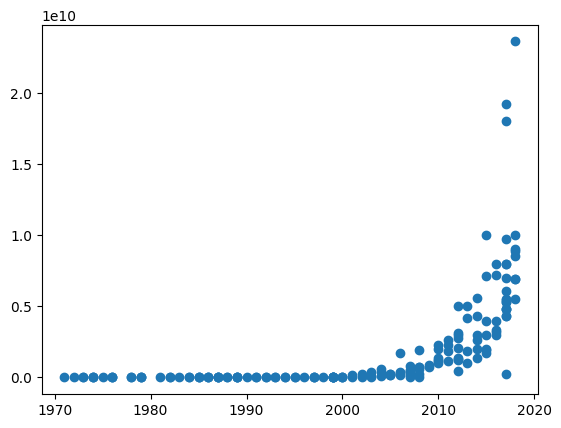

In [14]:
#plot the data
plt.scatter(X, Y);


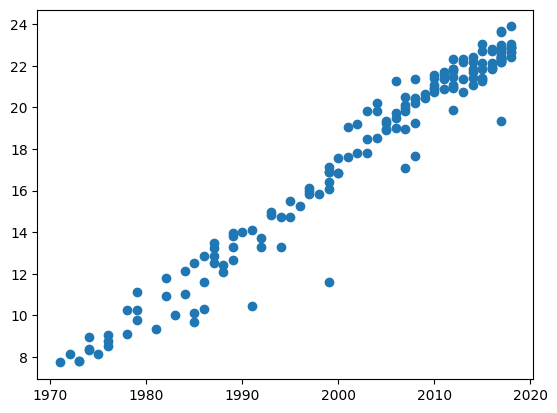

In [15]:
Y = np.log(Y)
plt.scatter(X,Y);

In [16]:
X=X-X.mean()

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),
    loss='mse',
)

In [23]:
def schedule(epoch, lr):
  if epoch >=50:
    return 0.0001
  return 0.0001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [25]:
r = model.fit(X,Y, epochs=200, callbacks = [scheduler])

Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 324.3672 - lr: 1.0000e-04
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 314.1861 - lr: 1.0000e-04
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 307.9516 - lr: 1.0000e-04
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 304.9055 - lr: 1.0000e-04
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 298.7941 - lr: 1.0000e-04
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 290.2608 - lr: 1.0000e-04
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 288.7710 - lr: 1.0000e-04
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 287.5469 - lr: 1.0000e-04
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 271.2074 - lr: 1.0000e-04
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 266.8174 - lr: 1.0000e-04
Epoch 11/200
6/6 [===========

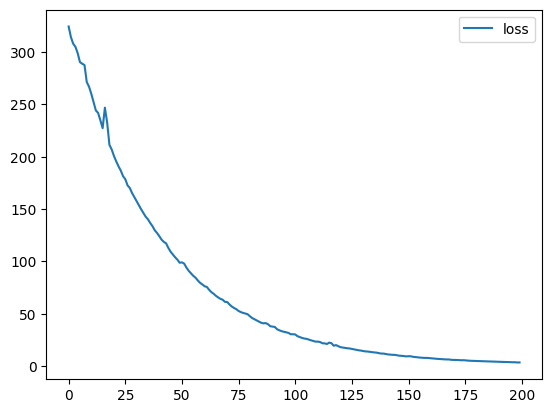

In [26]:
#Plot the losee
plt.plot(r.history['loss'], label = 'loss')
plt.legend();

In [27]:
model.layers

In [28]:
model.layers[0].get_weights()

[array([[0.36957902]], dtype=float32), array([16.199226], dtype=float32)]

In [29]:
a = model.layers[0].get_weights()[0][0,0]

In [30]:
a

0.36957902

In [31]:
print("Time to double :", np.log(2)/a)


Time to double : 1.8755046914784876


In [32]:
X = X.flatten()
denominator = X.dot(X)-X.mean()*X.sum()
a = (X.dot(Y)-Y.mean()*X.sum())/denominator
b = (Y.mean()*X.dot(X)-X.mean()*X.dot(Y)/denominator)
print(a,b)

0.341682487387313 536033.5789372206


In [33]:
print("Time to doubler:", np.log(2)/a)

Time to doubler: 2.0286295205239204
